In [114]:
depth_path = '/content/drive/MyDrive/Project/Object_tracking/depth_frame_300.npy'

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# from PIL import Image

# Load depth map
# depth_map = Image.open(img_path)
# depth_map = depth_map.convert('L')
depth_map = np.load(depth_path)

In [115]:
depth_map

array([[1.6790354, 1.6813554, 1.6830689, ..., 3.0283597, 3.026196 ,
        3.0238504],
       [1.6811543, 1.6834745, 1.6852117, ..., 3.0329907, 3.0309024,
        3.0286434],
       [1.6843636, 1.686684 , 1.6884408, ..., 3.0395505, 3.037551 ,
        3.035383 ],
       ...,
       [1.6227045, 1.6247374, 1.6263127, ..., 1.7034593, 1.7024881,
        1.7013334],
       [1.6197507, 1.6217327, 1.6232657, ..., 1.7016618, 1.7006984,
        1.6995535],
       [1.617824 , 1.6197681, 1.6212707, ..., 1.7005036, 1.6995459,
        1.6984065]], dtype=float32)

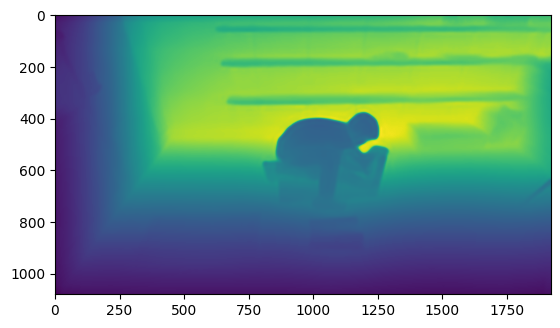

In [116]:
fig, ax = plt.subplots()
# plt.plot(1074, 541, marker="o", markersize=5, markerfacecolor="red") #for testing specific point

ax.imshow(depth_map)

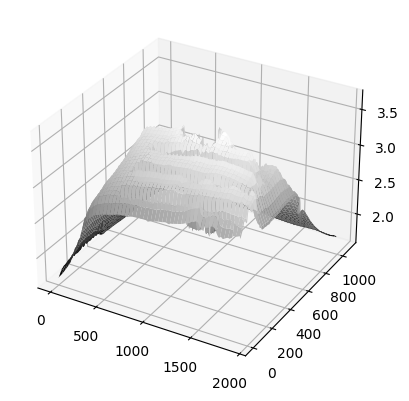

In [117]:
# Create a meshgrid
x = np.linspace(0, depth_map.shape[1], depth_map.shape[1])
y = np.linspace(0, depth_map.shape[0], depth_map.shape[0])
x, y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, depth_map, cmap='gray')

# Show the plot
plt.show()

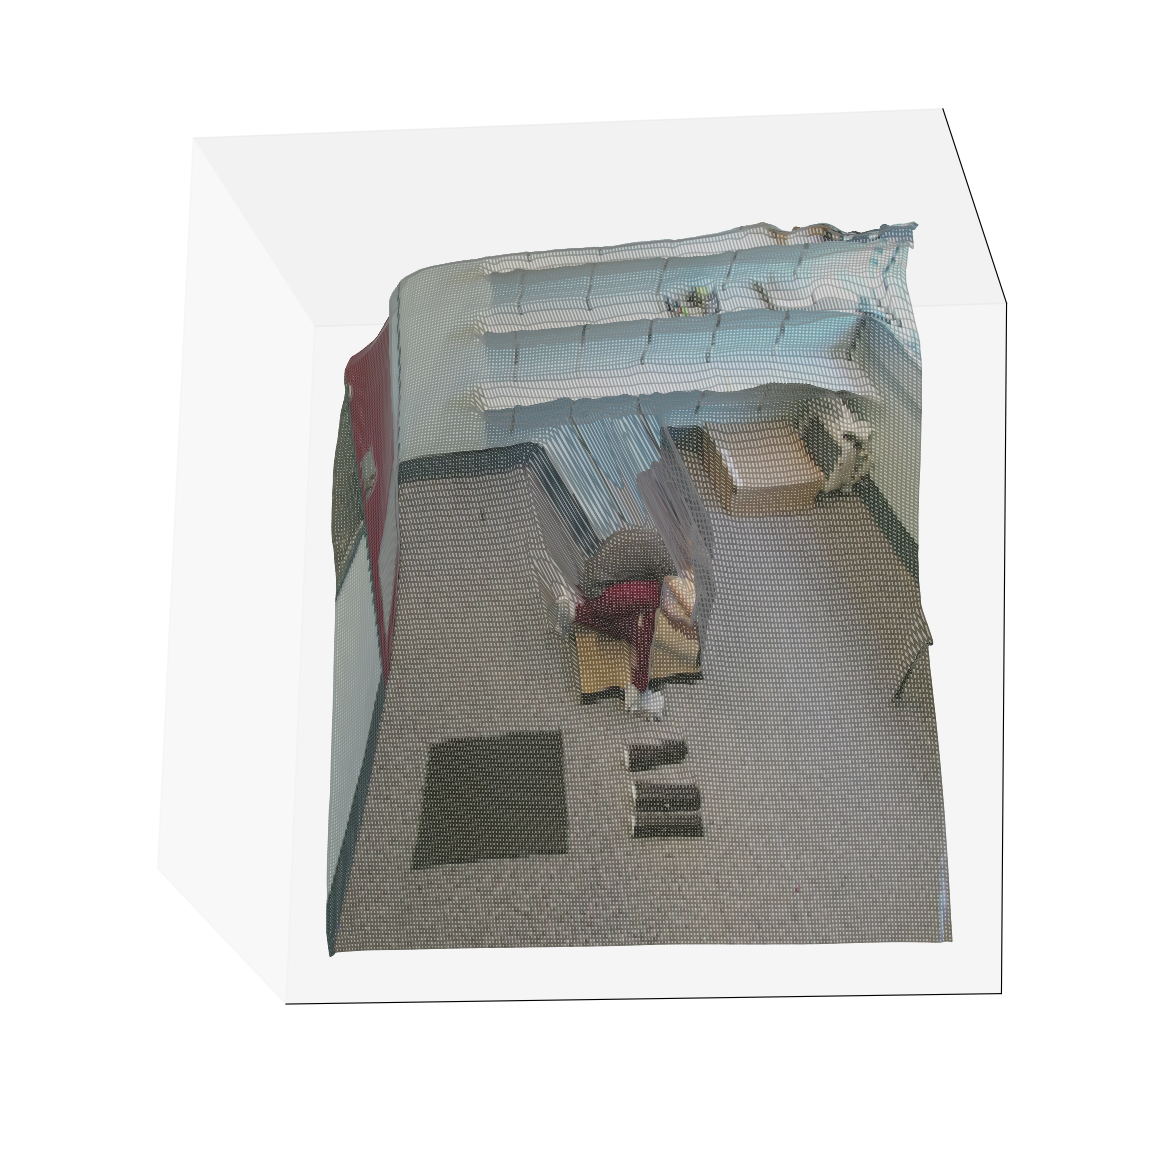

In [118]:
from PIL import Image

# Load RGB image and resize to match depth map
rgb_image = Image.open('/content/drive/MyDrive/Project/Object_tracking/test_frame_300.png')
rgb_image = rgb_image.resize(depth_map.shape[::-1])  # Resize to match depth map
rgb_image = np.asarray(rgb_image)

# Create a meshgrid
x = np.linspace(0, depth_map.shape[1], depth_map.shape[1])
y = np.linspace(0, depth_map.shape[0], depth_map.shape[0])
x, y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the wireframe
ax.plot_surface(x, y, depth_map, facecolors=rgb_image / 255.0, alpha=0.5, rcount=200, ccount=200)
ax.plot_wireframe(x, y, depth_map, color='grey', linewidth=0.5, alpha=0.5, rcount=200, ccount=200)

# Adjust the viewing angle
ax.view_init(elev=110, azim=-60, roll=-150)
ax.invert_xaxis()
# Hide gridlines
ax.grid(False)

# hide the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Show the plot
plt.show()


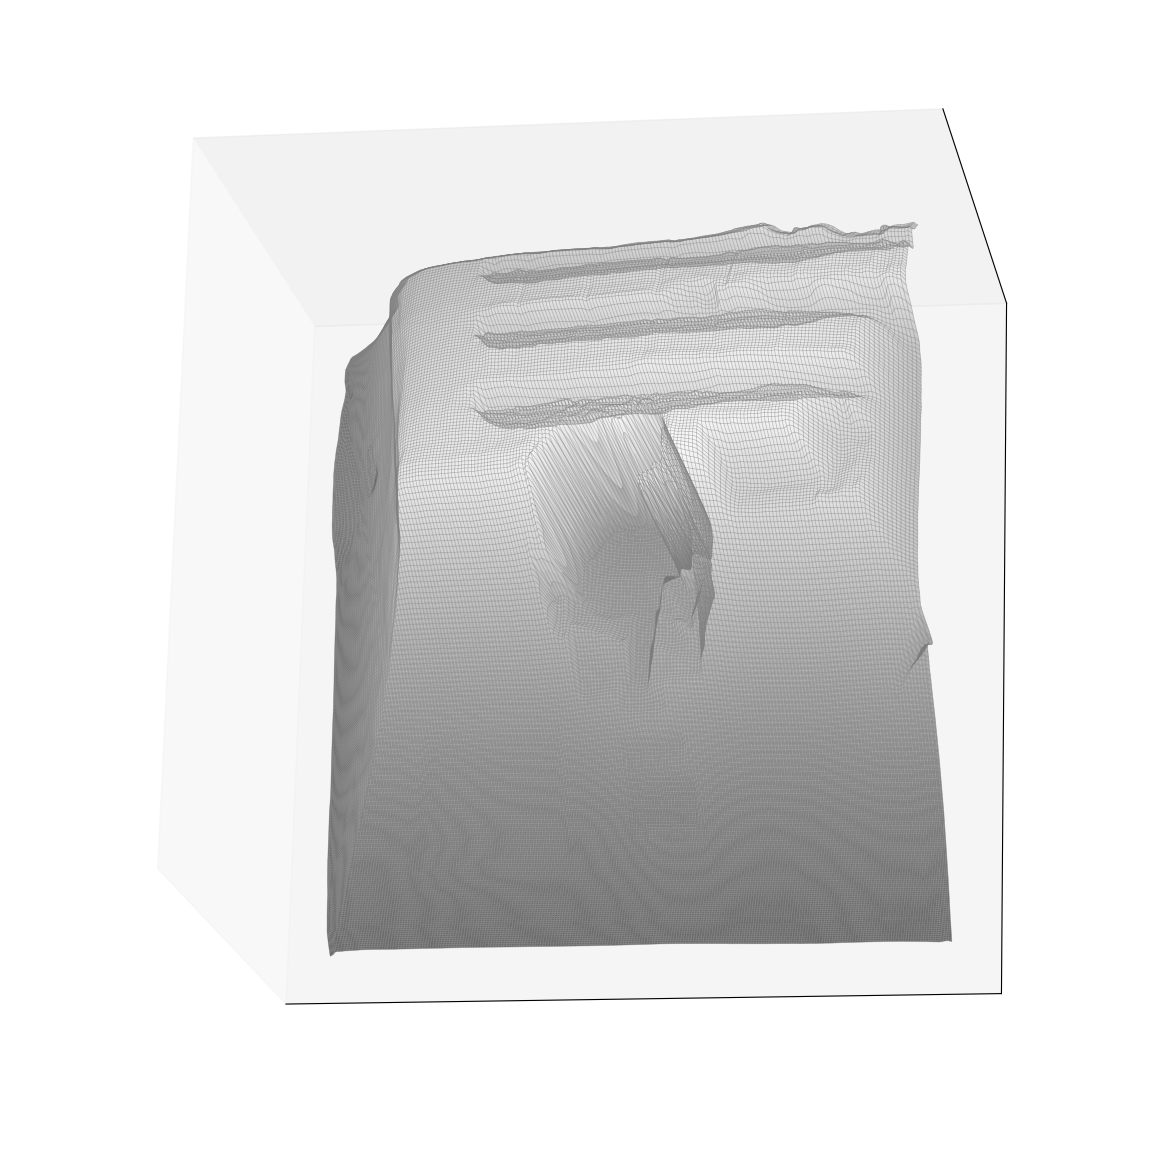

In [119]:

# Create a meshgrid
x = np.linspace(0, depth_map.shape[1], depth_map.shape[1])
y = np.linspace(0, depth_map.shape[0], depth_map.shape[0])
x, y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the wireframe
ax.plot_surface(x, y, depth_map, cmap='gray', alpha=0.6, rcount=400, ccount=400)
ax.plot_wireframe(x, y, depth_map, color='gray', linewidth=0.5, alpha=0.5, rcount=200, ccount=200)

# Adjust the viewing angle
ax.view_init(elev=110, azim=-60, roll=-150)
ax.invert_xaxis()
# Hide gridlines
ax.grid(False)

# hide the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Show the plot
plt.show()

In [120]:
import pandas as pd
# load masks from phase 2 outputs
df = pd.read_hdf('/content/drive/MyDrive/Project/Object_tracking/test_frame_300.h5', key='df')
df

,label,confidence,mask
0,table leg,0.517169,"[[False, False, False, False, False, False, Fa..."
1,table leg,0.455079,"[[False, False, False, False, False, False, Fa..."
2,table leg,0.323588,"[[False, False, False, False, False, False, Fa..."
3,tabletop,0.421671,"[[False, False, False, False, False, False, Fa..."
4,tabletop,0.380492,"[[False, False, False, False, False, False, Fa..."


In [121]:
df.loc[0, 'mask']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [122]:
def get_depth_value(depth_map, x, y):
    if int(y) < depth_map.shape[0] and int(x) < depth_map.shape[1]:
        return depth_map[int(y), int(x)]
    else:
        return "Coordinate out of bounds"

def get_mask_points(mask, depth_map):
    points_3d = []
    object_points = np.argwhere(mask)
    for point in object_points:
        z = get_depth_value(depth_map, point[1], point[0])
        point_3d = (point[1], point[0], z)
        points_3d.append(point_3d)
    return points_3d


<ipython-input-123-c931beec684e>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mask_colors = get_cmap('Oranges')(norm(depth_map[mask_y.astype(int), mask_x.astype(int)]))
<ipython-input-123-c931beec684e>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mask_colors2 = get_cmap('Blues')(norm(depth_map[mask_y2.astype(int), mask_x2.astype(int)]))


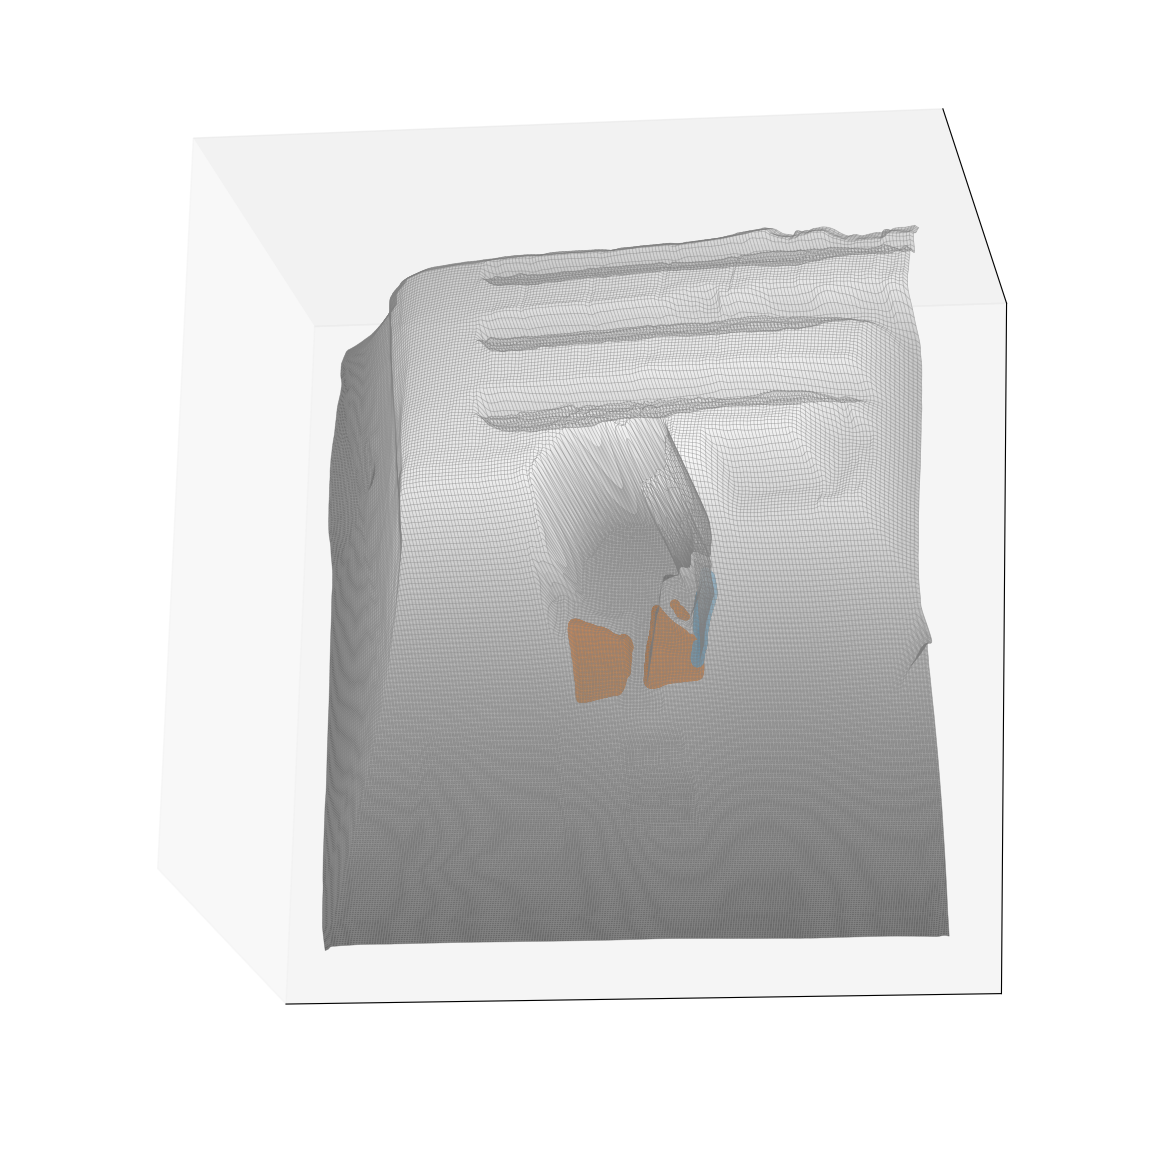

In [123]:
from matplotlib.cm import get_cmap

# Create a meshgrid
x = np.linspace(0, depth_map.shape[1], depth_map.shape[1])
y = np.linspace(0, depth_map.shape[0], depth_map.shape[0])
x, y = np.meshgrid(x, y)

# Create a colormap for the depth map values
norm = plt.Normalize(depth_map.min(), depth_map.max())
# Load RGB image and resize to match depth map
rgb_image = Image.open('/content/drive/MyDrive/Project/Object_tracking/test_frame_300.png')
rgb_image = rgb_image.resize(depth_map.shape[::-1])  # Resize to match depth map
rgb_image = np.asarray(rgb_image)
# Create a 3D plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# ax.plot_surface(x, y, depth_map, facecolors=rgb_image / 255.0, alpha=0.9, rcount=200, ccount=200)
ax.plot_surface(x, y, depth_map, cmap='gray', alpha=0.6, rcount=400, ccount=400)
ax.plot_wireframe(x, y, depth_map, color='gray', linewidth=0.5, alpha=0.5, rcount=200, ccount=200)

# add masks plots
mask_points = get_mask_points(df.loc[2, 'mask'], depth_map)  # mask points
mask_points = np.array(mask_points)
mask_x, mask_y, mask_z = mask_points[:, 0], mask_points[:, 1], mask_points[:, 2]
mask_colors = get_cmap('Oranges')(norm(depth_map[mask_y.astype(int), mask_x.astype(int)]))
ax.scatter(mask_x, mask_y, mask_z, color=mask_colors, alpha=0.6)

mask_points2 = get_mask_points(df.loc[1, 'mask'], depth_map)
mask_points2 = np.array(mask_points2)
mask_x2, mask_y2, mask_z2 = mask_points2[:, 0], mask_points2[:, 1], mask_points2[:, 2]
mask_colors2 = get_cmap('Blues')(norm(depth_map[mask_y2.astype(int), mask_x2.astype(int)]))
ax.scatter(mask_x2, mask_y2, mask_z2, color=mask_colors2, alpha=0.6)

# Adjust the viewing angle
ax.view_init(elev=110, azim=-60, roll=-150)  # Adjust azimuth as needed
ax.invert_xaxis()
# Hide gridlines
ax.grid(False)

# Optionally, hide the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# Show the plot
plt.show()